# Streamlit Models
---

### Load packages and dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import silhouette_score
import joblib

# Load data
df = pd.read_csv("hotel_bookings_full.csv")

### Inspect and clean dataframe 

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# Check column N/A's
df_nas = df.isna().sum()
df_nas.sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [9]:
# Check column 0's
df_nas = (df == 0).sum()
df_nas.sort_values(ascending=False)

babies                            118473
previous_bookings_not_canceled    115770
days_in_waiting_list              115692
is_repeated_guest                 115580
previous_cancellations            112906
required_car_parking_spaces       111974
children                          110796
booking_changes                   101314
is_canceled                        75166
total_of_special_requests          70318
stays_in_weekend_nights            51998
stays_in_week_nights                7645
lead_time                           6345
adr                                 1959
adults                               403
customer_type                          0
company                                0
agent                                  0
reservation_status                     0
deposit_type                           0
hotel                                  0
assigned_room_type                     0
reserved_room_type                     0
distribution_channel                   0
market_segment  

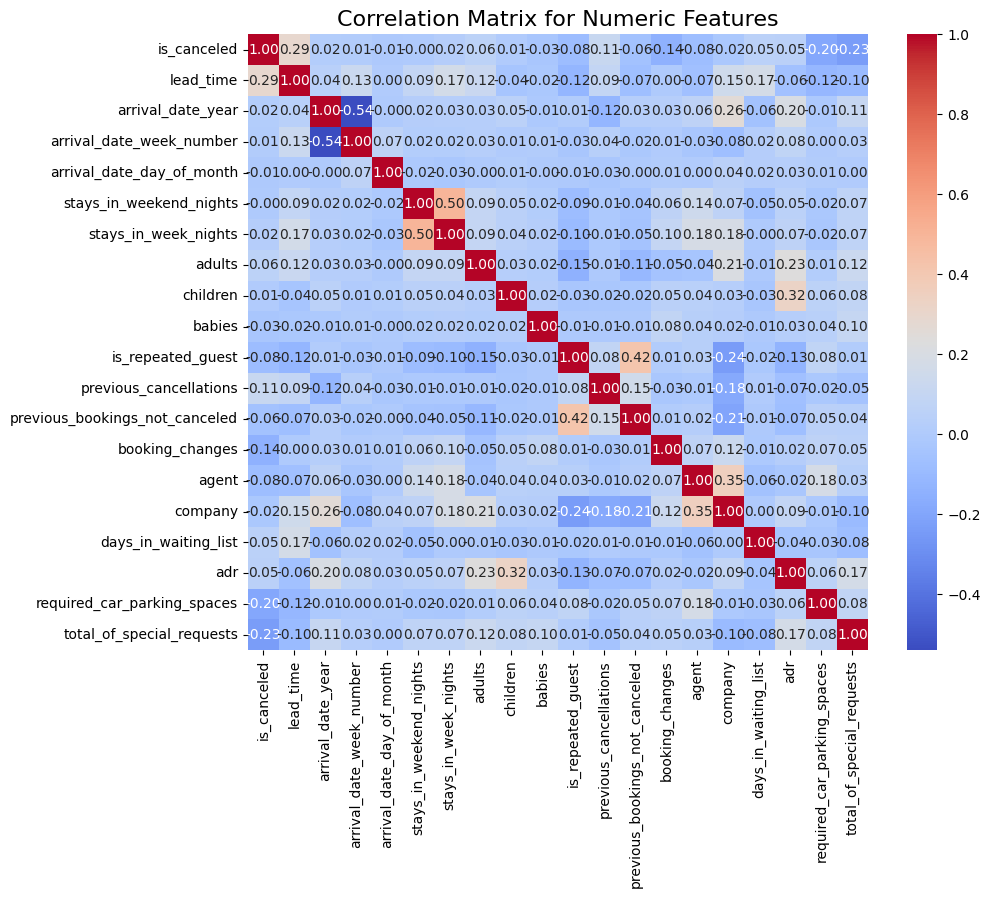

In [10]:
# Inspect correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numeric Features", fontsize=16)
plt.show()

In [11]:
# Convert months to numbers
df['arrival_date_month'] = pd.to_datetime(df['arrival_date_month'], format='%B').dt.month

# Drop unnecessary columns
df = df.drop(columns=['company'])  # Large number of N/A's
df = df.drop(columns=['assigned_room_type'])  # Not significant
df = df.drop(columns=['reservation_status', 'reservation_status_date'])  # Not significant

# Remove all rows with N/A's
df = df.dropna()

# Convert floats to integers
df['children'] = df['children'].astype(int)
df['agent'] = df['agent'].astype(int)

# Remove all outliers in price
df = df[(df['adr'] > 1) & (df['adr'] < 1000)]

# Reduce dataset size
df = df.sample(frac=0.5, random_state=42)

In [12]:
# Define column types
cat_col = ['hotel', 'country', 'market_segment', 'distribution_channel', 'deposit_type', 'agent', 'customer_type']
ord_col = ['meal', 'reserved_room_type']
num_col = ['lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
           'adults', 'children', 'babies', 'required_car_parking_spaces', 'total_of_special_requests', 
           'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list']

categories = [['Undefined', 'SC', 'BB', 'HB', 'FB'],
              ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']]

# Preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=categories))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_col),
        ('ord', ordinal_transformer, ord_col),
        ('cat', categorical_transformer, cat_col)
])

### 1. Cancellation Probability

In [13]:
# Define target column
target_col = 'is_canceled'

# Define predictors and target variable
X = df.drop(columns=[target_col])
y = df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Machine learning pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        min_samples_split=2
))])

# Fit pipeline to data
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['lead_time',
                                                   'arrival_date_year',
                                                   'arrival_date_month',
                                                   'arrival_date_week_number',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'required_car_parking_spaces',
                                                   'total_of_specia...
                                                   'reserved_room_type']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['hotel', 'country',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'deposit_type', 'agent',
                                                   'customer_type'])])),
                ('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(n_estimators=200))])

In [15]:
# Save trained model using joblib
joblib.dump(pipe, 'cancellation.pkl', compress=3)

['cancellation.pkl']

The generalization accuracy score of this model is 0.871699224501816.
To achieve this score, the following hyperparameters have been used:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      6167
           1       0.87      0.80      0.83      4020

    accuracy                           0.87     10187
   macro avg       0.87      0.86      0.86     10187
weighted avg       0.87      0.87      0.87     10187



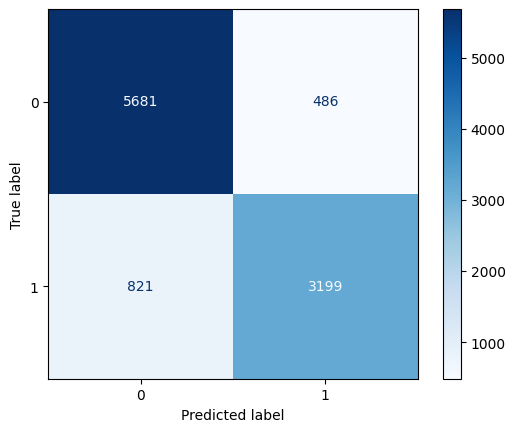

In [16]:
# Best model and generalization score
y_test_pred = pipe.predict(X_test)
generalization_score = accuracy_score(y_test, y_test_pred)

# Results
print(f'The generalization accuracy score of this model is {generalization_score}.')
print('To achieve this score, the following hyperparameters have been used:')

# Check Classification Report
class_rep = classification_report(y_test, y_test_pred)
print(class_rep)

# Check Confusion Matrix
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=pipe.named_steps['classifier'].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.named_steps['classifier'].classes_)

disp.plot(cmap="Blues")
plt.grid(False)
plt.show()

### 2. Optimal Price

In [17]:
# Define target column
target_col = 'adr'

# Define predictors and target variable
X = df.drop(columns=[target_col])
y = df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Machine learning pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        min_samples_split=2
))])

# Fit pipeline to data
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['lead_time',
                                                   'arrival_date_year',
                                                   'arrival_date_month',
                                                   'arrival_date_week_number',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'required_car_parking_spaces',
                                                   'total_of_specia...
                                                   'reserved_room_type']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['hotel', 'country',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'deposit_type', 'agent',
                                                   'customer_type'])])),
                ('scaler', StandardScaler()),
                ('classifier', RandomForestRegressor(n_estimators=200))])

In [19]:
# Save trained model using joblib
joblib.dump(pipe, 'pricing.pkl', compress=3)

['pricing.pkl']

The Mean Absolute Error (MAE) of this model is 7.0614.
The Root Mean Squared Error (RMSE) of this model is 13.7925.
The R-squared score of this model is 0.9133.


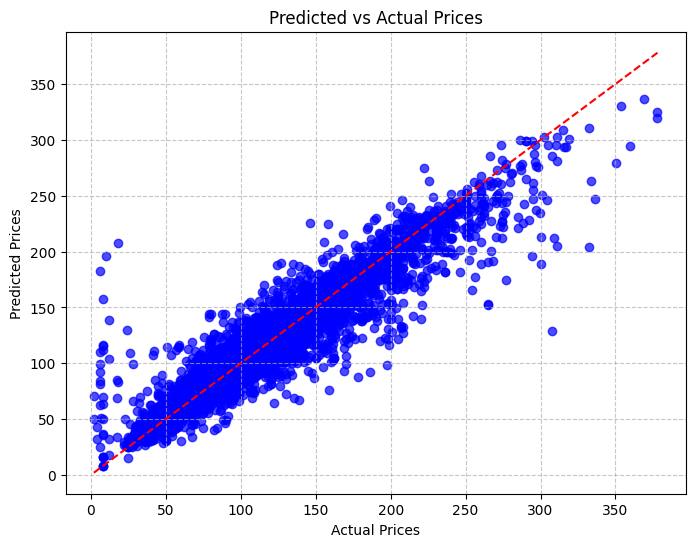

In [20]:
# Best model and generalization score
y_test_pred = pipe.predict(X_test)

# Generalization scores
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Results
print(f'The Mean Absolute Error (MAE) of this model is {mae:.4f}.')
print(f'The Root Mean Squared Error (RMSE) of this model is {rmse:.4f}.')
print(f'The R-squared score of this model is {r2:.4f}.')

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 3. Customer Type

In [21]:
# Define predictors
X = df

In [22]:
# Machine learning pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('cluster', KMeans(
        n_clusters=2,
        init='random'
))])

pipe.fit(X)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['lead_time',
                                                   'arrival_date_year',
                                                   'arrival_date_month',
                                                   'arrival_date_week_number',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'required_car_parking_spaces',
                                                   'total_of_specia...
                                                  ['meal',
                                                   'reserved_room_type']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['hotel', 'country',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'deposit_type', 'agent',
                                                   'customer_type'])])),
                ('scaler', StandardScaler()),
                ('cluster', KMeans(init='random', n_clusters=2))])

In [23]:
labels = pipe['cluster'].labels_
X_transformed = pipe['preprocessor'].transform(X)

score = silhouette_score(X_transformed, labels)

print(f'Score: {score:.4f}')

Score: 0.1581


### End